# **Problema de Flujo máximo a coste mínimo.**

***Nombre:*** Borja Guanche Sicilia 

***Correo:*** alu0101205908@ull.edu.es

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
!pip install ortools
!pip install ortoolsfrom ortools.linear_solver import pywraplp
from ortools.linear_solver import pywraplp
!pip install tabulate
from tabulate import tabulate

ERROR: Could not find a version that satisfies the requirement ortoolsfrom (from versions: none)
ERROR: No matching distribution found for ortoolsfrom


In [ ]:
n = 20
v = range(n)
s = 0    # Nodo fuente (inicio)
t = n-1  # Nodo sumidero (destino)

random.seed(1024)

In [ ]:
# Función para dibujar los nodos y arcos
def dibuja(selected):

    fig, ax = plt.subplots()
    for (i,j) in selected:
      plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'r-')
    plt.plot([p[0] for p in points], [p[1] for p in points], 'co')
    [ax.annotate(i, (points[i][0], points[i][1])) for i in range(n) if i != s and i != t]
    ax.annotate("s", (points[s][0], points[s][1])); ax.annotate("t", (points[t][0], points[t][1]))
    plt.plot(points[s][0],points[s][1], 'ys'); plt.plot(points[t][0],points[t][1], 'ys')


# Función para mostrar los costes y las capacidades de los arcos
def mostrarCostesCapacidades(pares, puntos, costes, capacidades):

  lista = []; lista.append(["Nodo origen (i):", "Nodo destino (j):", "Capacidad:", "Coste unitario:"])
  for (i,j) in pares:
      if puntos[i][0] != puntos[j][0] and puntos[i][1] != puntos[j][1]:
        if i == s:
          lista.append(["s", j, capacidades[i,j], costes[i,j]])
        elif j == s:
          lista.append([i, "s", capacidades[i,j], costes[i,j]])
        elif j == t:
          lista.append([i, "t", capacidades[i,j], costes[i,j]])
        elif i == t:
          lista.append(["t", j, capacidades[i,j], costes[i,j]])
        else:
          lista.append([i, j, capacidades[i,j], costes[i,j]])
  
  print(tabulate(lista, headers="firstrow", tablefmt="fancy_grid", showindex=False))
  print("\n\n")


# Función para mostrar la solución que devuelve problema de Flujo Máximo a coste mínimo
def mostrarSolucion(aristas, coste, capacidades):

  solucion = []; solucion.append(["Nodo origen (i):", "Nodo destino (j):", "Capacidad:", "Coste unitario:", "Flujo:", "Coste:", "Coste acumulado:"])
  aristasS = []; costeAcc = 0
  for i in v:
    for j in v:
      if aristas[i,j].solution_value() > 0.5:
        costeXflujo = coste[i,j] * aristas[i,j].solution_value()
        costeAcc += costeXflujo
        if i == s:
          solucion.append(["s", j, capacidades[i,j], coste[i,j], aristas[i,j].solution_value(), costeXflujo, costeAcc])
        elif j == t:
          solucion.append([i, "t", capacidades[i,j], coste[i,j], aristas[i,j].solution_value(), costeXflujo, costeAcc])
        else:
          solucion.append([i, j, capacidades[i,j], coste[i,j], aristas[i,j].solution_value(), costeXflujo, costeAcc])
        aristasS.append((i, j))

  print(tabulate(solucion, headers="firstrow", tablefmt="fancy_grid", showindex=False))
  
  return aristasS

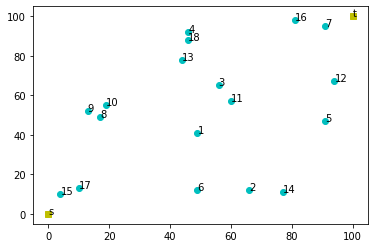

In [ ]:
# Generamos los n nodos 
points   = [(random.randint(0, 100),random.randint(0, 100)) for i in v]

points[0]=[0, 0] # Nodo inicial (esquina inferior izquierda)
points[n-1]=[100, 100] # Nodo final (esquina superior derecha)

dibuja({})

╒════════════════════╤═════════════════════╤══════════════╤═══════════════════╕
│ Nodo origen (i):   │ Nodo destino (j):   │   Capacidad: │   Coste unitario: │
╞════════════════════╪═════════════════════╪══════════════╪═══════════════════╡
│ s                  │ 1                   │            5 │                68 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┤
│ s                  │ 15                  │            4 │                10 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┤
│ s                  │ 17                  │            6 │                19 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┤
│ 1                  │ 2                   │            7 │                38 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┤
│ 1                  │ 11                  │           10 │                19 │
├────────────────────┼──────────────────

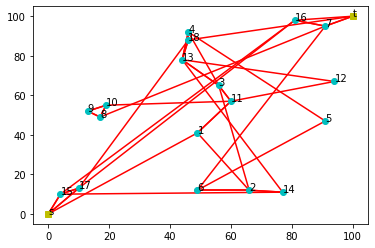

In [ ]:
c =  np.zeros((n, n)) # Matriz de costos
k =  np.zeros((n, n)) # Matriz de capacidades

# Asignación aleatoria de los costes y de las capacidades
for i in v :
  for j in v:
    if j != i:
      dx = points[i][0] - points[j][0]
      dy = points[i][1] - points[j][1]
      dist = math.floor(math.sqrt(dx*dx + dy*dy)*random.uniform(1.0, 1.2))
      if dist > 20 and j != i + 1 :
        c[i, j] = 1000
        k[i, j] = 0.0
      else :
        c[i, j] = dist
        k[i, j] = random.randint(1, 10)
        
selected = [(i, j) for i in v for j in v if c[i, j] < 200]
dibuja(selected)
mostrarCostesCapacidades(selected, points, c, k)

In [ ]:
#Flujo máximo

solver = pywraplp.Solver('Flujo máximo', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

x = { (i,j) : solver.IntVar(0.0, solver.infinity(), 'x[%i, %i]' % (i, j)) for i in v for j in v }
z = solver.IntVar(0.0, solver.infinity(), 'z')
            
solver.Maximize(z)

# 1
[ solver.Add(solver.Sum(x[s,j] - x[j,s] for j in v if j != s) == z) ]

# 2
[ solver.Add(solver.Sum(x[t,j] - x[j,t] for j in v if j != t) == -z) ]

# 3
[ solver.Add(solver.Sum(x[i,j] - x[j,i] for j in v if i != j ) == 0 ) for i in v if i != s and i != t ]

# 4
[ solver.Add(x[i,j] <= k[i,j]) for j in v for i in v ]
    
solver.Solve()

flujoMax = solver.Objective().Value()
print('El flujo máximo es: ', flujoMax)

El flujo máximo es:  13.0


╒════════════════════╤═════════════════════╤══════════════╤═══════════════════╤══════════╤══════════╤════════════════════╕
│ Nodo origen (i):   │ Nodo destino (j):   │   Capacidad: │   Coste unitario: │   Flujo: │   Coste: │   Coste acumulado: │
╞════════════════════╪═════════════════════╪══════════════╪═══════════════════╪══════════╪══════════╪════════════════════╡
│ s                  │ 1                   │            5 │                68 │        3 │      204 │                204 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┼──────────┼──────────┼────────────────────┤
│ s                  │ 15                  │            4 │                10 │        4 │       40 │                244 │
├────────────────────┼─────────────────────┼──────────────┼───────────────────┼──────────┼──────────┼────────────────────┤
│ s                  │ 17                  │            6 │                19 │        6 │      114 │                358 │
├───────────────

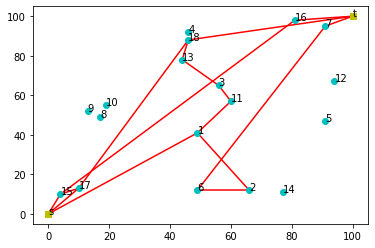

In [ ]:
# Flujo máximo a coste mínimo

solver1 = pywraplp.Solver('Flujo máximo a coste mínimo', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

f = { (i,j) : solver1.IntVar(0.0, k[i,j], 'f[%i, %i]' % (i, j)) for i in v for j in v }

solver1.Minimize(solver1.Sum(c[i,j] * f[i,j]  for i in v for j in v if i != j ))

# 1
[ solver1.Add(solver1.Sum(f[s, i] - f[i, s] for i in v if i != s) == flujoMax)]

# 2
[ solver1.Add(solver1.Sum(f[t, i] - f[i, t] for i in v if i != t) == -flujoMax)]

# 3
[ solver1.Add(solver1.Sum(f[i, j] - f[j, i] for i in v ) == 0 ) for j in v if j != s and j != t ]

# 4
[ solver1.Add(f[i, j] <= flujoMax) for j in v for i in v ]

solver1.Solve()

aristasSol = mostrarSolucion(f, c, k)
print("\n\nCoste camino: ", solver1.Objective().Value(), "\n\n")
dibuja(aristasSol)